In [1]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Individual Project Planning**

Ann Huynh

***1) Data Description***

Players Dataset (players.csv)
- 7 columns, 196 rows, 1372 variables
- columns:
  - experience (categorical: Pro, Veteran, Regular, Amateur, Beginner) -> the playing experience of the player
  - subscribe (factor: True/False) -> whether the player subscribed to the game newsletter
  - hashedEmail (character) -> the hashed email of the player
  - played_hours (numeric) -> the number of hours played by the player
  - name (character) -> the name of the player
  - gender (categorical: Female, Male) -> the gender of the player
  - Age (numeric) -> the age of the player

Sessions Dataset (sessions.csv)
- 5 columns, 1535 rows, 7675 variables
- columns:
  - hashedEmail (character) -> hashed email of the player
  - start_time (numeric) -> start date and time. date in day/month/year and time in military time
  - end_time (numeric) -> end date and time. date in day/month/year and time in military time
  - original_start_time -> start time before converting to start_time
  - original_end_time -> end time before converting to end_time

Potential Issues with data:

- In the sessions dataset, the start_time and end_time columns contain more than one value. The columns have
  both date and time. This may need to be modified so that date and time are separate.
- original_start_time and original_end_time are not easily interpretable numbers so they must be converted or
  different columns should be used (like start_time or end_time)


Summary Statistics: 
For players dataset, 
- The average number of hours played is 5.85 hours
- The average age is 21.14 years

The code below computes these values. 

  
  

In [2]:
players <- read_csv("players.csv")

head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
avg_hours <- players |> 
    summarise(avg_hours = mean(played_hours))

avg_hours

avg_hours
<dbl>
5.845918


In [4]:
avg_age <- players |> 
    summarise(avg_age = mean(Age, na.rm = TRUE))
    

avg_age

avg_age
<dbl>
21.13918


***2) Questions***

- Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- Specific Question: Does the experience and age of a player predict whether or not they will subscribe to a game-related newsletter in the players dataset?

The player's dataset contains the experience (experience column) of each player and whether or not a player has already subscribed to a game-related newsletter. These variables will be important when addressing the specific question. 
Data wrangling may be necessary as the experience column is categorical, meaning that grouping might be needed in order to extract information. 

***3) Exploratory Data Analysis and Visualization***



In [5]:
#Report the mean value for each quantitative variable (played_hours and Age) in a table format

mean_vals <- bind_cols(avg_age, avg_hours)
    
mean_vals




avg_age,avg_hours
<dbl>,<dbl>
21.13918,5.845918


2 visualizations are produced below. To explore if experience affects whether a player subscribes or not, a bar plot can be plotted (second visualization shown below). However, it might be important to consider if other factors such as age affect experience and therefore affect whether or not they subcribed to a game-related newsletter. This is visualized below (first visualization shown below). 

In [6]:
age_groups <- players |> 
    arrange(Age) |> 
    mutate(Age = as_factor(Age)) |>
    count(experience, Age)

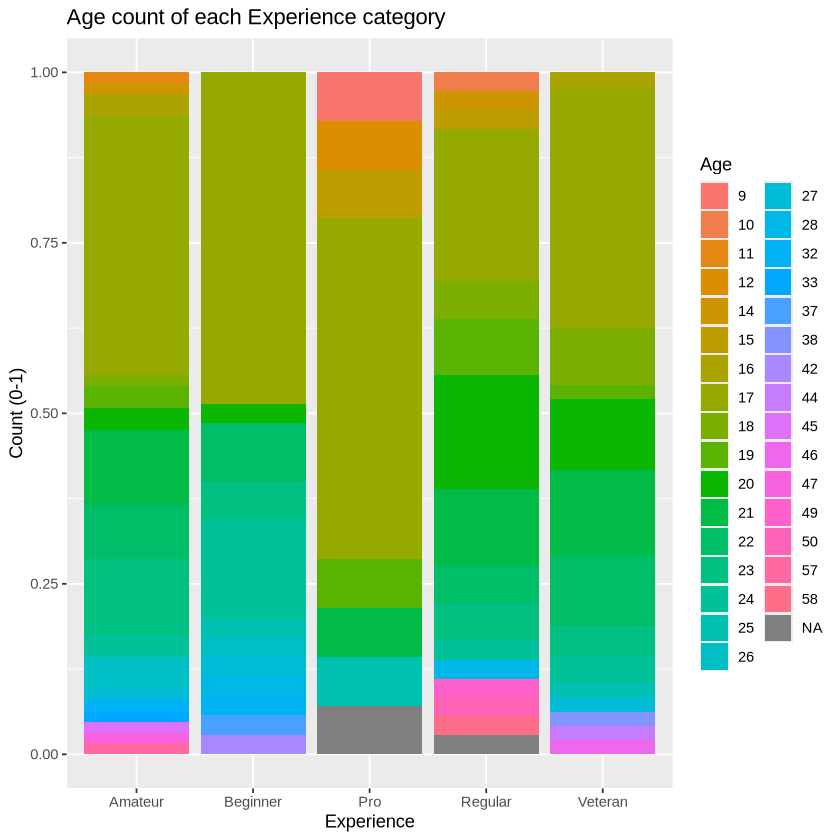

In [11]:
age_exp_plot <- ggplot(age_groups, aes(x = experience, y = n, fill = Age)) + 
    geom_bar(stat = "identity", position = "fill") + 
    labs(x = "Experience", y = "Count (0-1)", fill = "Age", title = "Age count of each Experience category")

age_exp_plot

In [12]:
sub_groups <- players |> 
    mutate(subscribe = as_factor(subscribe)) |>
    count(experience, subscribe)

sub_groups

experience,subscribe,n
<chr>,<fct>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
Pro,FALSE,4
Pro,TRUE,10
Regular,FALSE,7
Regular,TRUE,29
Veteran,FALSE,15


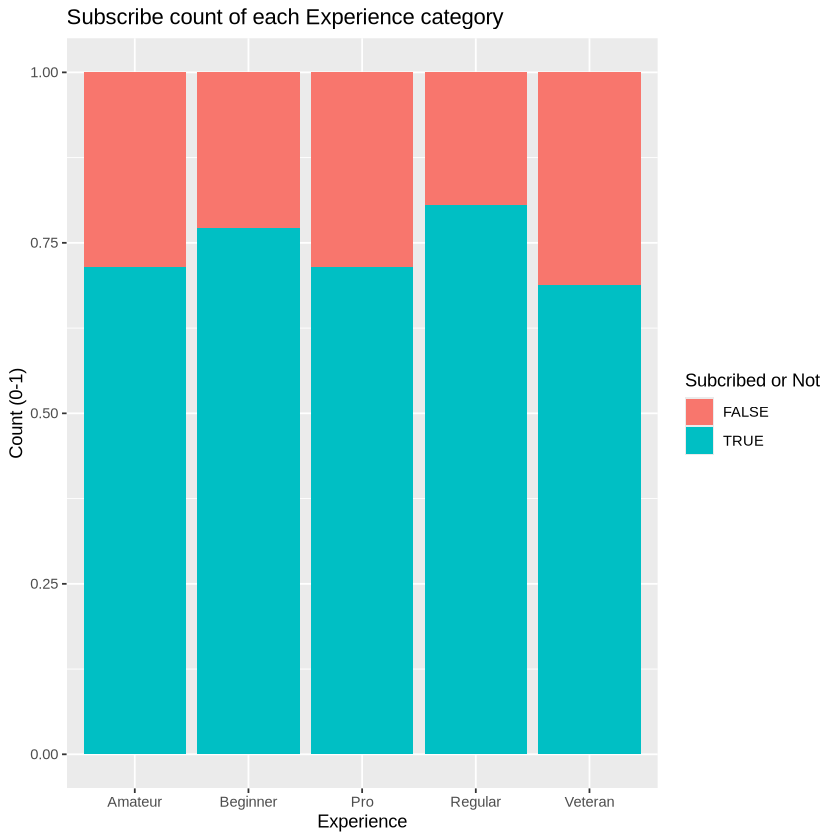

In [15]:
sub_exp_plot <- ggplot(sub_groups, aes(x = experience, y = n, fill = subscribe)) + 
    geom_bar(stat = "identity", position = "fill") + 
    labs(x = "Experience", y = "Count (0-1)", fill = "Subcribed or Not", title = "Subscribe count of each Experience category")

sub_exp_plot

***4) Methods and Plans***

One way to determine if experience and age predicts whether or not a player will subscribe to a newsletter is through K-NN classification. This method is appropriate because we want to classify a player's subscription status (TRUE/FALSE) based on 2 predictors: experience and Age. To execute this, we must convert experience to be a numerical values. For example, Beginner can be encoded as 1 and Pro can be encoded as 5. This way, the Euclidean distance can be computed to make the prediction. A potential weakness of this method is that when assigning categorical values to numbers, there may be some uncertainty in scaling. It is difficult to gauge how significant experience is. True differences may not be accurately reflected in the model. For data processing, firstly, experience must be converted to numerical values then scaling will be applied. The data will then be split into 70% training and 30% testing. The k with the highest accuracy will be used. To find best k, 5-fold cross validation will be done which determines k with the highest accuracy. This k will be used in the model. 